<a href="https://colab.research.google.com/github/ririzqah/classification-predict-streamlit-template/blob/master/Team16_model%20(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climate Change Classification Predict**

## Team 16
- Mashele Neo Ntsako 
- Meniers Rizqah
- Mzobe Zama 
- Nkadimeng Botseetsa Loveness 
- Thobejane Tladi Thaane 


## Table of Contents

<a href=#one> Introduction</a>

<a href=#two> Problem Statement

<a href=#three> Objectives</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#snine> Conclusion</a>

## Introduction

### Predict Overview: Climate Change Challenge

Over the course of millions of years, the global climate has experienced fluctuations. These shifts may be natural, but since the beginning of industrialisation, however, the composition of the atmosphere has changed as a result of greenhouse gas emissions. This global warming caused by human activities such as burning of fossil fuels intensifies the natural greenhouse effect and is leading to detectable changes to the climate. This global warming also has a significant effect on people and nature.


 The average global surface temperature has already increased by 1.04°C in the last 130 years. In particular, according to the scientific reports of the Intergovernmental Panel on Climate Change (IPCC), the sharp increase in global warming since 1950 can no longer be explained by natural climate fluctuations. It is highly likely that greenhouse gases such as carbon dioxide (CO₂) are responsible for this, which enter the atmosphere through the burning of fossil fuels such as coal, crude oil and natural gas and through large-​scale land use, for example, the deforestation of tropical rainforests, and increase the greenhouse effect.


## Problem Statement

In this project we are tasked to create a machine learning model that will be able to classify whether or not a person believes in climate change, based on their novel tweet data. The provision of an accurate and robust solution to this task gives will give companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.




## Objectives

The key objectives of this research project are as follow:

- Determine if some categories should be removed or not to better the performance of the model.
- Create a machine learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
- Evaluate the accuracy of the best machine learning model.



<a id="one"></a>
## 1. Importing packages

In [39]:
# Libraries for data loading, data manipulation and data visulisation
import nltk
import re
import csv
import string
from PIL import Image
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Downloads
#nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Libraries for data preparation and model building
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

# Setting global constants to ensure notebook results are reproducible
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,5)})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## THE TWEETS ARE CATEGORICAL INTO FOUR CATEGORIES


[ 2 ] News : Tweets linked to factual news about climate change.

[ 1 ] Pro : Tweets that support the belief of man-made climate change.

[ 0 ] Neutral : Tweets that neither support nor refuse beliefs of climate change.

[-1 ] Anti : Tweets that do not support the belief of man-made climate change.

<a id="two"></a>
## 2. Loading the Data

In [40]:
#Loading data so that we know the data we are about to analys
df_train = pd.read_csv('https://raw.githubusercontent.com/ririzqah/classification-predict-streamlit-template/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ririzqah/classification-predict-streamlit-template/master/test_with_no_labels.csv')

<a id="three"></a>
## 3. Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

In this section we will manipulate or drop unnecessary data from the data set before it is used in order to ensure or enhance performance.

In [41]:
#view train dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [42]:
#view train dataset
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Data size and Structure

In [44]:
#looking at the information of the dataset to know the data types of the features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 0 to 10545
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  float64
 1   message    26365 non-null  object 
 2   tweetid    26365 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 823.9+ KB


In [45]:
# Finding unique values in sentiment
df_train['sentiment'].unique()

array([ 1,  2,  0, -1])

Target variable/Dependent variable (sentiment) is discrete and categorical.

In [46]:
#looking at the shape of the dataset
df_train.shape

(26365, 3)

In [47]:
# Make a copy of the df so that if we make mistakes we can always refer to the original df
df_new = df.copy()

## Removing noise from the dataset

In [48]:
#removing noise such as web-urls, numbers and many more from the data set

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
#string of punctuations
print(string.punctuation)

#function to remove punctuation
def remove_punctuation(post):

    """
    This function removes punctuation from tweets, removes words with less than 
    three letters and converts everything to lowercase letters.

    Input:
    tweet: original tweet
           datatype: 'str'

    Output:
    tweet: modified tweet
           datatype: 'str'
    """

    return ''.join([l for l in post if l not in string.punctuation])

df_train['message'] = df_train['message'].apply(remove_punctuation)
df_test['message'] = df_test['message'].apply(remove_punctuation)

# Remove all words below 3 characters
df_train['newmessage'] = df_train['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_test['newmessage'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Changing from uppercase to lowercase
df_train['newmessage'] = df_train['newmessage'].str.lower()
df_test['newmessage'] = df_test['newmessage'].str.lower()

df_train.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,sentiment,message,tweetid,newmessage
0,1,PolySciMajor EPA chief doesnt think carbon dio...,625221,polyscimajor chief doesnt think carbon dioxide...
1,1,Its not like we lack evidence of anthropogenic...,126103,like lack evidence anthropogenic global warming
2,2,RT RawStory Researchers say we have three year...,698562,rawstory researchers have three years climate ...
3,1,TodayinMaker WIRED 2016 was a pivotal year in...,573736,todayinmaker wired 2016 pivotal year climate c...
4,1,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,soynoviodetodas 2016 racist sexist climate cha...


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)

### Univariate Analysis

In [49]:
# looking at the summary statistics of the numerical features
df.describe()

,sentiment,tweetid
count,15819.000000,26365.000000
mean,0.917504,499791.634971
std,0.836537,288678.408660
min,-1.000000,6.000000
25%,1.000000,249928.000000
50%,1.000000,499577.000000
75%,1.000000,748695.000000
max,2.000000,999983.000000


In [50]:
#Evaluating the kurtosis to chech for outliers
df.kurtosis()

sentiment    0.122976
tweetid     -1.193841
dtype: float64

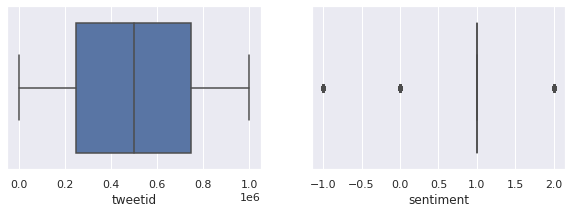

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
 
sns.boxplot(ax=axes[0], data=df_new, x='tweetid')
sns.boxplot(ax=axes[1], data=df_new, x='sentiment')

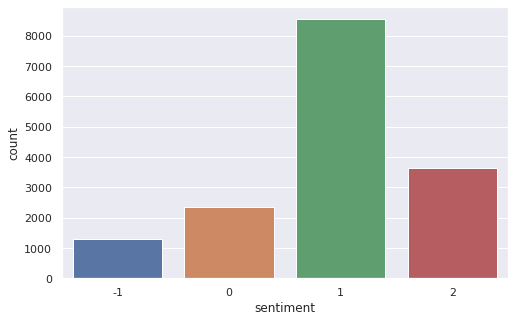

In [52]:
sns.countplot(df_train['sentiment'])

## Categorical variables

<a id="five"></a>
## 5. Data Engineering

#### **Tokenisation**

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words".

In [ ]:
    """
    This function creates a new dataframe df_train['tokenised_message'] by 
    tokenizing df_train['newmessages'], that is , the tweets in the train data 
    set.
    
    
    Input:
    df_train['newmessages']: original dataframe
        datatype: dataframe 
        
    Output:
    df_train['tokenised_message']: modified dataframe
        datatype: dataframe
    """

tokeniser = TreebankWordTokenizer()
df_train['tokenised_message'] = df_train['newmessage'].apply(tokeniser.tokenize)
df_train['tokenised_message'].iloc[2]

#### **Stemming**

Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

In [ ]:
stemmer = SnowballStemmer('english')

def message_stemmer(words, stemmer):
    """
    This function creates a new dataframe df_train['stemmed_message'] by 
    stemming words in df_train['tokenised_message'], that is , the tweets in the train data 
    set.
    
    
    Input:
    df_train['tokenised_message']: original dataframe
        datatype: dataframe 
        
    Output:
    df_train['stemmed_message']: modified dataframe
        datatype: dataframe
    """

    return [stemmer.stem(word) for word in words]

df_train['stemmed_message'] = df_train['tokenised_message'].apply(message_stemmer, args=(stemmer, ))

for i, t in enumerate(df_train.iloc[15]['tokenised_message']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[15]['stemmed_message'][i]))

#### **Lemmatization**

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [ ]:
lemmatizer = WordNetLemmatizer()

def message_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

df_train['lemma_message'] = df_train['tokenised_message'].apply(message_lemma, args=(lemmatizer, ))  

for i, t in enumerate(df_train.iloc[1]['tokenised_message']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[1]['lemma_message'][i]))

<a id="six"></a>
##  Modelling

In [ ]:
TFID = TfidfVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.90, 
                             ngram_range=(1, 3))

In [ ]:
# split data
X = df_train['newmessage']
y = df_train['sentiment']

#df_test
X_real = df_test['newmessage']

In [ ]:
X_vec_t = TFID.fit_transform(X)

###real
X_vec_t_real = TFID.transform(X_real)

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec_t, y, test_size=0.20, random_state=32, stratify=y)

### Preparing for modelling

### Base models

- A __support vector machine (SVM)__ is a supervised machine learning model that uses classification algorithms for two-group classification problems. SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane.

In [ ]:
# Fitting the Linear SVC model into the train dataset
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)


- __Logistic regression__ is a statistical model that in its basic form uses a logistic function to model a binary (two) dependent variable, for example pass/fail, win/lose, healthy/sick and many more. Its models are effective only for cases in which we have clearly linearly separable data, i.e, a straight line can be drawn between the different datapoints that definitively separates them.

In [ ]:
# Fitting the Logistic Regression Classifier model into the train dataset
lm_full = LogisticRegression()
lm_full.fit(X_train, y_train)


- 

In [ ]:
#Fitting the Decision Tree model into the train dataset
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

In [ ]:
# Fitting the K-Nearest Neighbors model into the train dataset 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


<a id="seven"></a>
## Model Performance

In [ ]:
# Use trained different models to run prediction on validation data
lsvc_pred= lsvc.predict(X_test)
lm_full_pred= lm_full.predict(X_test)
tree_pred= tree.predict(X_test)
knn_pred= knn.predict(X_test)

# Score
print("Linear SVC Metrics:")
print(metrics.classification_report(y_test, lsvc_pred))

print("Logistic Regression Classifier Metrics:")
print(metrics.classification_report(y_test, lm_full_pred))

print("Decision Tree Metrics:")
print(metrics.classification_report(y_test, tree_pred))

print("K-nearest neighbors Metrics:")
print(metrics.classification_report(y_test, knn_pred))

In [ ]:
# Assessing the performance of different models using the confusion matrix 

print("Linear SVC Model:")
print(confusion_matrix(y_test, lsvc_pred))

print("Logistic Regression Model:")
print(confusion_matrix(y_test, lm_full_pred))

print("Decision Tree Model:")
print(confusion_matrix(y_test, tree_pred))

print("K-nearest neighbors Model:")
print(confusion_matrix(y_test, knn_pred))

<a id="eight"></a>
## 8. Model Explanation

From the four different classification models that were considered, the SVC model was found to perform better than the other three models. This conclusion was drawn from the f1-score and the accuracy, that is, it has the highest f1-score of 0.61, 0.47, 0.81 and 0.75, respectively, and accuracy of 0.74.

In [ ]:
lsvc_pred_real= lsvc.predict(X_vec_t_real)

In [ ]:
df_test['sentiment'] = lsvc_pred_real

In [ ]:
df_test.head(25)

In [ ]:
df_test[['tweetid','sentiment']].to_csv('submission.csv', index=False)